# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 2


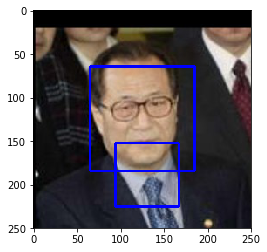

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[8])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
Percentage of human faces were detected: 98.0  % are detected
Percentage of dog faces detected as human: 17.0  % are detected as human

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## DONE: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.


In [5]:
## DONE: implemented a detector performance function
# human_files_short
faces_sum =[]
y=0
for index in range(len(human_files_short)):
    

    # load color (BGR) image
    img = cv2.imread(human_files_short[index])
    # convert BGR image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # find faces in image
    faces = face_cascade.detectMultiScale(gray)
    if (len(faces)):
        y += 1
    else :
        print("not detected index: ",index)
    # print percentage of faces detected in the image
print('Percentage of human faces were detected:', y/len(human_files_short)*100, " % are detected")



not detected index:  56
not detected index:  87
Percentage of human faces were detected: 98.0  % are detected


In [6]:
## DONE: implemented a detector performance function
# dog files
faces_sum =[]
y=0
for index in range(len(dog_files_short)):
    

    # load color (BGR) image
    img = cv2.imread(dog_files_short[index])
    # convert BGR image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # find faces in image
    faces = face_cascade.detectMultiScale(gray)
    if (len(faces))!=0:
        y += 1
    # print percentage of faces NOT detected in the image
print('Percentage of dog faces detected as human:', y/len(dog_files_short)*100, " % are detected as human")

Percentage of dog faces detected as human: 17.0  % are detected as human


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [7]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [8]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:45<00:00, 12191842.84it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [9]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## DONE: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    im = Image.open(img_path)
    im = im.convert("RGB")
    im_transform = transforms.Compose([
                        transforms.Resize(size=(244, 244)),
                        transforms.ToTensor()
        ])
    # plt.imshow(im)        - commented out
    # plt.show()
    im = im_transform(im)[:3,:,:].unsqueeze(0)
    if use_cuda:
        im = im.cuda()
    return torch.max(VGG16(im),1)[1].item() # predicted class index



In [10]:
VGG16_predict(dog_files_short[0])
# 243: 'bull mastiff',

243

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [11]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## DONE: Complete the function.
    det = VGG16_predict(img_path)
    if det > 150 and det < 269:
        alma = True
    else:
        alma = False
    return alma # true/false

In [12]:
print(dog_detector(dog_files_short[0]))

True


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  Percentage of human detected as dog: 0.0  % are detected
- What percentage of the images in `dog_files_short` have a detected dog? Percentage of dog detected: 96.0  % are detected

__Answer:__ Percentage of human detected as dog: 0.0 % are detected

Percentage of dog detected: 96.0 % are detected - see bthe result in code below

In [13]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

def performancer(perf_file) :
    dog_sum =[]
    y=0
    for index in range(len(perf_file)):
    
        # find dogs in image
        dogs = dog_detector(perf_file[index])
        if dogs:
            y += 1
        else :
            print("not detected index: ",index)

    # print percentage of faces detected in the image
    print('Percentage of dog detected:', y/len(perf_file)*100, " % are detected")
    
performancer(dog_files_short)    



not detected index:  27
not detected index:  32
not detected index:  36
Percentage of dog detected: 97.0  % are detected


In [14]:
performancer(human_files_short)  

not detected index:  0
not detected index:  1
not detected index:  2
not detected index:  3
not detected index:  4
not detected index:  5
not detected index:  6
not detected index:  7
not detected index:  8
not detected index:  9
not detected index:  10
not detected index:  11
not detected index:  12
not detected index:  13
not detected index:  14
not detected index:  15
not detected index:  16
not detected index:  17
not detected index:  18
not detected index:  19
not detected index:  20
not detected index:  21
not detected index:  22
not detected index:  23
not detected index:  24
not detected index:  25
not detected index:  26
not detected index:  27
not detected index:  28
not detected index:  29
not detected index:  30
not detected index:  31
not detected index:  32
not detected index:  33
not detected index:  34
not detected index:  35
not detected index:  36
not detected index:  37
not detected index:  38
not detected index:  39
not detected index:  40
not detected index:  41
no

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [15]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [16]:
import os
import numpy as np
import torchvision.transforms as transforms
from torchvision import datasets
from glob import glob
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

## DONE: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# load filenames for human and dog images
dog_files_train = np.array(glob("/data/dog_images/train/*/*"))
dog_files_valid = np.array(glob("/data/dog_images/valid/*/*"))
dog_files_test = np.array(glob("/data/dog_images/test/*/*"))

# print number of images in each dataset
print('There are %d total train images.' % len(dog_files_train))
print('There are %d total validation images.' % len(dog_files_valid))
print('There are %d total test images.' % len(dog_files_test))

# transformation
transformed_data = {'train': transforms.Compose([transforms.Resize(256),
                                     transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]),
                    
                    'valid': transforms.Compose([transforms.Resize(256),
                                     transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]),
                    
                    'test': transforms.Compose([transforms.Resize(size = (224, 224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
                  }

#data loaders
batch_size = 20
num_workers = 0
shuffle = True

train_dataset = datasets.ImageFolder("/data/dog_images/train", transformed_data['train'])
valid_dataset = datasets.ImageFolder("/data/dog_images/valid", transformed_data['valid'])
test_dataset = datasets.ImageFolder("/data/dog_images/test", transformed_data['test'])

loaders_scratch = {'train': torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=shuffle),
                   'valid':  torch.utils.data.DataLoader(valid_dataset,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=shuffle),
                   'test':  torch.utils.data.DataLoader(test_dataset,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=shuffle),
                  }


There are 6680 total train images.
There are 835 total validation images.
There are 836 total test images.


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 224 x224 pixels as most of the Conv. Neural Networks use it as standard. I think usually the images are  larger than this, so i think stretching is not necessary. I use flip and crop to make the learning harder ensure that the learning not fitted only for the train dataset.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [17]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3,  padding=1)
        
        self.pool1 = nn.MaxPool2d(2 , 2) 
        
        self.fc1 = nn.Linear(7 * 7 * 128, 913) # sqrt(size * class no) 
        self.fc2 = nn.Linear(913 , 133)
        
        self.drop1 = nn.Dropout(0.25)        
        
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool1(x)
        x = F.relu(self.conv3(x))
        x = self.pool1(x)
        
        
        x = x.view(-1, 7 * 7 * 128)
        
        x = self.drop1(x)
        x = F.relu(self.fc1(x))
        
        x = self.drop1(x)
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    print(model_scratch.cuda())

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=913, bias=True)
  (fc2): Linear(in_features=913, out_features=133, bias=True)
  (drop1): Dropout(p=0.25)
)
Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=913, bias=True)
  (fc2): Linear(in_features=913, out_features=133, bias=True)
  (drop1): Dropout(p=0.25)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=913, bias=True)
  (fc2): Linear(in_features=913, out_features=133, bias=True)
  (drop1): Dropout(p=0.25)
)

After every layer i use a maxpool layer.
I tried to keep the layer as minimum as it can be. For 224 pixel input image the padding , the kernel size and the Stride determines the size of the layer:
image size + 2\*(padding size)-kernel size / stride +1 .
The first two layer this way size the input image size down by 2.
133 classes determine the output.
The 7 \*7 \*128 determines the input of the fully connected layer :6272
The fc1 input and the out_feature determines the Fc2 input / Fc1 output :
sqrt(input size \* class no) 913.
i used 0.25 dropout layer to block overfitting.

In forward function i used relu activation as it fits more to CNN and DL aplication with its positive value and linearity and its adventage in training.



### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [18]:
import torch.optim as optim

### DONE: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### DONE: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.04)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [19]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # lets clear the gradients for optimalization
            optimizer.zero_grad()
            # store the predicted output to output variable
            output = model(data)
            # loss calculation - CrossEntropyLoss() as selected before
            loss = criterion(output, target)
            # backward pass and optimalization
            loss.backward()
            optimizer.step()
            # record the average training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # store the predicted output to output variable
            output = model(data)
            # loss calculation - CrossEntropyLoss() as selected before
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.868989 	Validation Loss: 4.822899
Validation loss decreased (inf --> 4.822899).  Saving model ...
Epoch: 2 	Training Loss: 4.759624 	Validation Loss: 4.697366
Validation loss decreased (4.822899 --> 4.697366).  Saving model ...
Epoch: 3 	Training Loss: 4.619079 	Validation Loss: 4.591343
Validation loss decreased (4.697366 --> 4.591343).  Saving model ...
Epoch: 4 	Training Loss: 4.554148 	Validation Loss: 4.582798
Validation loss decreased (4.591343 --> 4.582798).  Saving model ...
Epoch: 5 	Training Loss: 4.484832 	Validation Loss: 4.612838
Epoch: 6 	Training Loss: 4.419044 	Validation Loss: 4.406137
Validation loss decreased (4.582798 --> 4.406137).  Saving model ...
Epoch: 7 	Training Loss: 4.366803 	Validation Loss: 4.382413
Validation loss decreased (4.406137 --> 4.382413).  Saving model ...
Epoch: 8 	Training Loss: 4.296514 	Validation Loss: 4.310045
Validation loss decreased (4.382413 --> 4.310045).  Saving model ...
Epoch: 9 	Training Loss: 4.250611 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [20]:

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.593100


Test Accuracy: 19% (159/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [21]:
## DONE: Specify data loaders


# transformation
transformed_data = {'train': transforms.Compose([transforms.Resize(256),
                                     transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]),
                    
                    'valid': transforms.Compose([transforms.Resize(256),
                                     transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]),
                    
                    'test': transforms.Compose([transforms.Resize(size = (224, 224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
                  }

#data loaders
batch_size = 20
num_workers = 0
shuffle = True

train_dataset = datasets.ImageFolder("/data/dog_images/train", transformed_data['train'])
valid_dataset = datasets.ImageFolder("/data/dog_images/valid", transformed_data['valid'])
test_dataset = datasets.ImageFolder("/data/dog_images/test", transformed_data['test'])

loaders_transfer = {'train': torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=shuffle),
                   'valid':  torch.utils.data.DataLoader(valid_dataset,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=shuffle),
                   'test':  torch.utils.data.DataLoader(test_dataset,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=shuffle),
                  }


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [22]:
import torchvision.models as models
import torch.nn as nn

## DONE: Specify model architecture 
model_transfer = models.resnet50( pretrained = True )

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 98165032.39it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I opened a discusion about the model on slack. My target was to use a good performance model , but the size was the second criteria. My first approach was DenseNet-121 because of its size , but the suggestion from others was Resnet50 because of its performance on image classification and relatively not big size. I set the last fc layer to 133 for the dog breeds and switch on its grad parameter for training, i freezed the weights of the model and set learning rate 0.01 momentum 0.5 .
The model work well this optimization as the validation loss slightly higher than the train one, so there is no danger for overfitting, the model can fit to the dataset (epoch=20)


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [23]:
model_transfer.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [24]:
model_transfer.fc = nn.Linear(2048, 133, bias = True)

In [25]:
model_transfer


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [30]:
# freeze all parameters since we're only optimizing the target image
for param in model_transfer.parameters():
    param.requires_grad = False

In [31]:
#set only fc layer gradient on
for param in model_transfer.fc.parameters():
    param.requires_grad = True

In [32]:
if use_cuda:
    model_transfer = model_transfer.cuda()
    print('model run in GPU')

model run in GPU


In [33]:
# using the CrossEntropyLoss
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr = 0.01, momentum = 0.5)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [30]:
# train the model
model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda,'model_transfer.pt')
# train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')



Epoch: 1 	Training Loss: 3.541966 	Validation Loss: 2.279245
Validation loss decreased (inf --> 2.279245).  Saving model ...
Epoch: 2 	Training Loss: 2.031911 	Validation Loss: 1.602308
Validation loss decreased (2.279245 --> 1.602308).  Saving model ...
Epoch: 3 	Training Loss: 1.550550 	Validation Loss: 1.296836
Validation loss decreased (1.602308 --> 1.296836).  Saving model ...
Epoch: 4 	Training Loss: 1.329988 	Validation Loss: 1.170299
Validation loss decreased (1.296836 --> 1.170299).  Saving model ...
Epoch: 5 	Training Loss: 1.206676 	Validation Loss: 1.098105
Validation loss decreased (1.170299 --> 1.098105).  Saving model ...
Epoch: 6 	Training Loss: 1.126709 	Validation Loss: 0.990946
Validation loss decreased (1.098105 --> 0.990946).  Saving model ...
Epoch: 7 	Training Loss: 1.052339 	Validation Loss: 1.008269
Epoch: 8 	Training Loss: 0.996913 	Validation Loss: 0.939429
Validation loss decreased (0.990946 --> 0.939429).  Saving model ...
Epoch: 9 	Training Loss: 0.954438 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [41]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

In [42]:
if use_cuda:
    model_transfer = model_transfer.cuda()
    print('model run in GPU')
    




model run in GPU


In [43]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.471561


Test Accuracy: 85% (715/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [44]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

#last 10 class names
class_names[-11:-1]



['Pomeranian',
 'Poodle',
 'Portuguese water dog',
 'Saint bernard',
 'Silky terrier',
 'Smooth fox terrier',
 'Tibetan mastiff',
 'Welsh springer spaniel',
 'Wirehaired pointing griffon',
 'Xoloitzcuintli']

In [91]:
import os
import numpy as np
import torchvision.transforms as transforms
from torchvision import datasets
import torch.nn.functional as F
from glob import glob
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True



In [105]:
def predict_breed_transfer(img_path):
    #loading
    img = Image.open(img_path)
    # img transform
    transform_predict = transforms.Compose([transforms.Resize(224),
                                     transforms.RandomResizedCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
    # image tensor 
    img_trans = transform_predict(img)
    # load the image and return the predicted breed
    if torch.cuda.is_available():
        img_trans = img_trans.cuda()
        
    else:
        img_trans
    out_data = model_transfer(img_trans.unsqueeze(0))
    output_percent = F.softmax(out_data, dim = 1)
    output_pred = int(out_data.argmax())
    
    return class_names[output_pred], float(output_percent[0][output_pred])

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [106]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline  

def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0



def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    face_det = face_detector(img_path)
    breed_det , det_percent = predict_breed_transfer(img_path)
    img_copy = plt.imread(img_path)


    if face_det:
            plt.imshow(img_copy)
            plt.title('You seem human. But look like {}'.format(breed_det)) 
            plt.show()
    elif det_percent <= 0.20:
            plt.imshow(img_copy)
            plt.title('Error?! Ups, neither seems dog nor human.')
            plt.show()    
    else :
            plt.imshow(img_copy)
            plt.title('It seems dog. And look like a {}'.format(breed_det)) 
            plt.show()    
    return breed_det

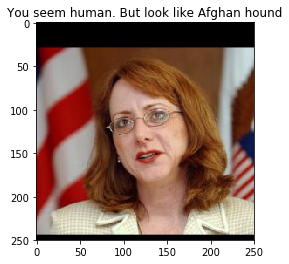

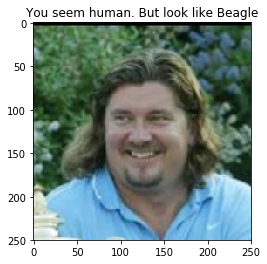

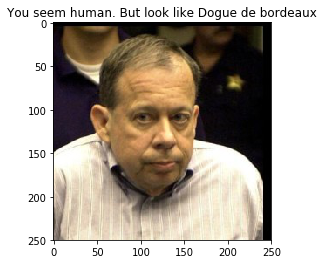

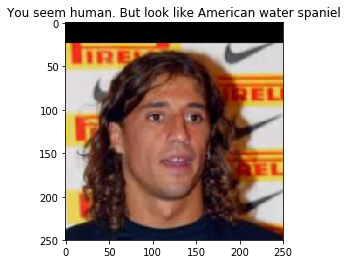

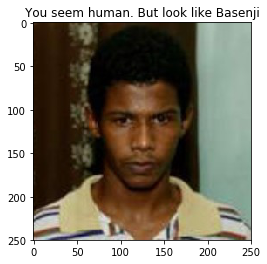

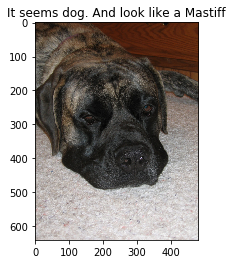

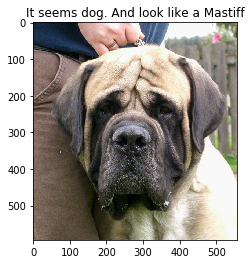

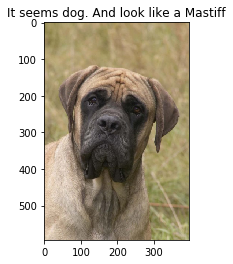

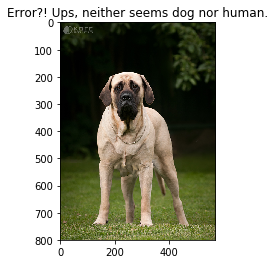

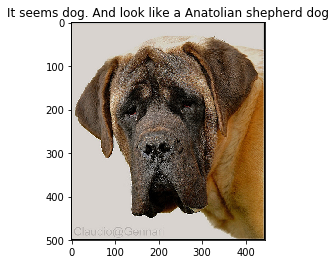

In [108]:
#/data/dog_images/Labrador_retriever_06457.jpg
#run_app ('Labrador_retriever_06457.jpg')

human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))
dog_files_short = dog_files[10:15]
human_files_short = human_files[15:20]
test_files_short = np.concatenate((human_files_short, dog_files_short), axis=0)

for index in range(10):
    run_app(test_files_short[index])
    

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The output is worse than expected. The classification works really bad. I think we have to change the last two layers.
I also think, that with a bigger data_set the prediction and the learning process would be more precize.
The next issu is the optimizer of the model. Maybe i have to try the adam optimization.
The 85% test accuracy is not so bad, i really greet that number at the end of the test.
The next problem is the variety of the train images. The model do not recognize the non-face animals (last one -terrier dog), it would be train with those kind of pictures.
There is also a problem with the file formats. The model do not handle the png images, as these formats totally different from jpg images. It is also a room for improvement. 
Also it fails with the graphic pictures, so maybe a detection for them may improve the performance.


In [130]:
## DONE: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.


test_files_short = np.array(glob("./images/*"))
print(test_files_short)
print('There are %d total images.' % len(test_files_short))



['./images/Labrador_retriever_06449.jpg' './images/sample_dog_output.png'
 './images/Brittany_02625.jpg' './images/sample_human_output.png'
 './images/American_water_spaniel_00648.jpg' './images/Dano.jpg'
 './images/022415_Mols_VanRossum.large.jpg'
 './images/13-animorphia-coloring-pages.jpg'
 './images/Curly-coated_retriever_03896.jpg'
 './images/Labrador_retriever_06457.jpg'
 './images/Labrador_retriever_06455.jpg'
 './images/airedale-terrier-detail.jpg'
 './images/Welsh_springer_spaniel_08203.jpg'
 './images/Alaskan-Klee-Kai-482x260.png' './images/sample_cnn.png']
There are 15 total images.


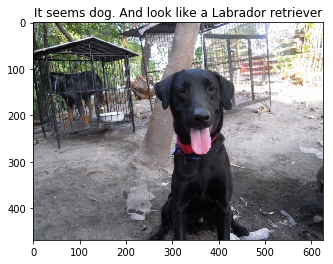

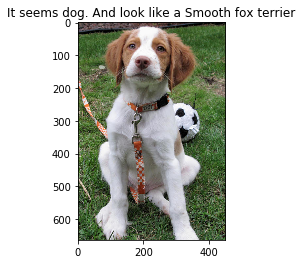

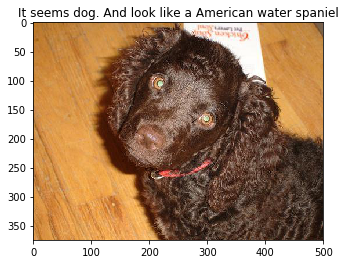

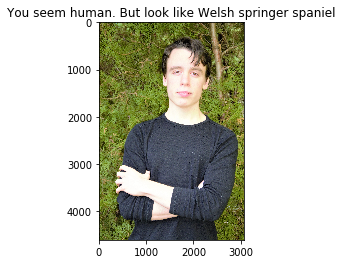

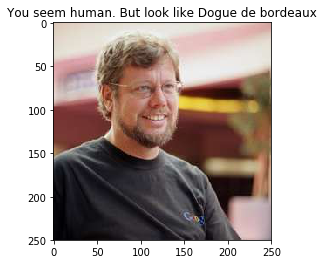

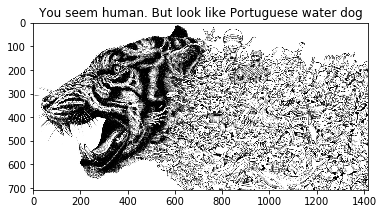

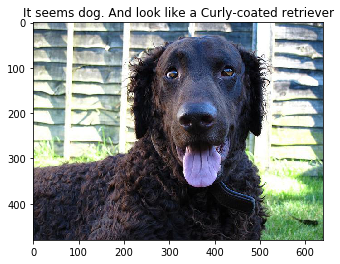

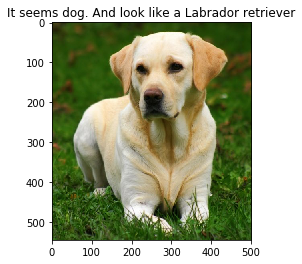

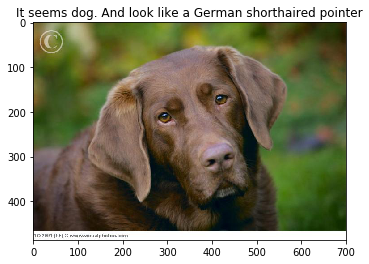

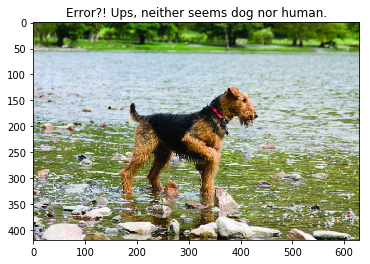

In [129]:
## suggested code, below
#for file in np.hstack((human_files[:3], dog_files[:3])):
#   run_app(file)

#test images uploaded to the server and the png images deleted from the array.
test_files_short = ['./images/Labrador_retriever_06449.jpg', 
 './images/Brittany_02625.jpg', 
 './images/American_water_spaniel_00648.jpg', 
 './images/Dano.jpg',
 './images/022415_Mols_VanRossum.large.jpg',
 './images/13-animorphia-coloring-pages.jpg',
 './images/Curly-coated_retriever_03896.jpg',
 './images/Labrador_retriever_06457.jpg',
 './images/Labrador_retriever_06455.jpg',
 './images/airedale-terrier-detail.jpg',
 './images/Welsh_springer_spaniel_08203.jpg']
for index in range(10):    
    run_app(test_files_short[index])